## Introduction  
Presentation by Fred Etter  
- quick bio
- what is data science ?
- short predictive program
- longer predictive program to forecast demand

## What is Data Science ?  
- "[A] Person who is better at statistics than any software engineer and better at software engineering than any statistician." (a tweet from Josh Willis -a data engineer)  
- various data science functions
    - Data cleaning
    - Data visualization
    - ETL - Extract, Transform, Load
    - Machine learning
    - Operations research
    - Data analysis (MS Excel)
    - Experimental design (A/B testing)
- Another definition:  Using the combination of programming, statistics and math to predict things (machine learning).
    - the weather
    - hurricane paths
    - earthquakes
    - whether an email is spam or not
    - revenue growth
    - pregnancy status of Target customers
    - **future sales of a manufacturing or retail company (forecasting)**

## A short program
This python program that tries to predict if a specific combination of 'duration' and 'loudness' for a song is more closely related to a jazz song or a rock song.  If it predicts a jazz song, the result of the funtion will return a 1, otherwise it will be classified as a rock song and return a 0.  

This program is the calculation occurring under the hood of the Nearest Neighbor algorithm from SciKit Learn.

### Import python modules

In [1]:
import numpy as np
import pandas as pd
import math
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Create the dataframe 

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]



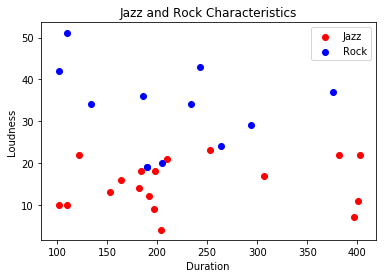

In [3]:
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

How would you classify a point with Duration = 190 and Loudness = 24 ?

### Build the program

In [4]:
# convert the colums of the dataframe to lists
dur = list(music['duration'])
loud = list(music['loudness'])
jazz = list(music['jazz'])

# set intitial list, 'list_distance' equal to an empty list.
list_distance = []

# create the nn (neirest neighbor) function
def nn(d, l):
    list_distance = []
    for x, y in zip(dur, loud):
        
        # calculate distance between all training points from the new inputs (can use numpy.norm)
        distance = math.sqrt((d - x)**2 + math.sqrt((l - y)**2))
         
        # append the distances to 'list_distance'
        list_distance.append(distance)
        
        # find the minimum distance in list_distance
        min_distance = min(list_distance) 
        
        # capture the index for the min_distance value
        index = list_distance.index(min_distance)
    
    # return the minimum distance betweeen the user input data and the closest training data
    # then return the corresponding jazz or not jazz value
    return min_distance, jazz[index]                          
                                 
# run some tests; if the second returned value is a 1 we can classify as jazz, otherwise we classify as rock
print(nn(190, 24))
print(nn(400, 5))
print(nn(100, 3))
print(nn(100, 50))


(2.23606797749979, 0)
(2.6457513110645907, 1)
(3.3166247903554, 1)
(3.4641016151377544, 0)


### Evaluate the program  

Using the short program:

In [5]:
# run some tests; if the second returned value is a 1 we can classify as jazz, otherwise we classify as rock
print(nn(190, 24))
print(nn(400, 5))
print(nn(100, 3))
print(nn(100, 50))


(2.23606797749979, 0)
(2.6457513110645907, 1)
(3.3166247903554, 1)
(3.4641016151377544, 0)


Using K Neighbors Classifier from Scikit-Learn: 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['duration', 'loudness']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[190, 24]]))
print(neighbors.predict([[400, 5]]))
print(neighbors.predict([[100, 3]]))
print(neighbors.predict([[100, 50]]))


[0]
[1]
[1]
[0]


As you can see, the results from the code matches the results from the Nearest Neighbor algo from SKLearn.

### What if we were wrong ?  How can we make our program better ?

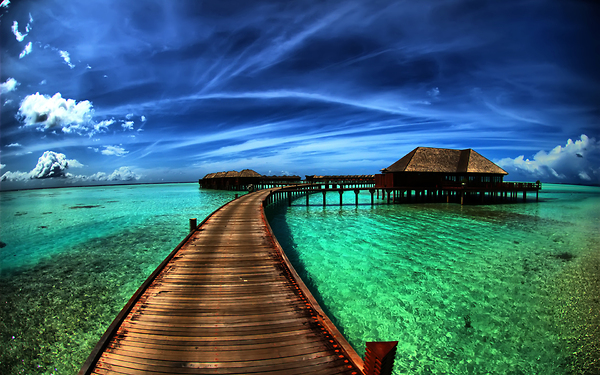

In [7]:
from IPython.display import Image
Image(filename='nature_pic.jpg')

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['duration', 'loudness']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[190, 24]]))
print(neighbors.predict([[400, 5]]))
print(neighbors.predict([[100, 3]]))
print(neighbors.predict([[100, 50]]))

[1]
[1]
[1]
[0]


It changed !

## A Regression Model  - Simple Linear and KNN Comparison
First, import data (from Kaggle) and clean.  This data is 5 years of store-item sales.

In [9]:
df_train = pd.read_csv('train.csv')
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [10]:
df_train.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


We need to drop some rows due to system memory constraints.

In [11]:
df_train.drop(df_train.sample(700000).index, inplace=True)
df_train.head()

,date,store,item,sales
2,2013-01-03,1,1,14
11,2013-01-12,1,1,7
17,2013-01-18,1,1,7
20,2013-01-21,1,1,8
22,2013-01-23,1,1,9


Convert the date column to a datetime datatype for graphing purposes.

In [12]:
df_train['date_time'] = pd.to_datetime(df_train['date'])
df_train.head()

,date,store,item,sales,date_time
2,2013-01-03,1,1,14,2013-01-03
11,2013-01-12,1,1,7,2013-01-12
17,2013-01-18,1,1,7,2013-01-18
20,2013-01-21,1,1,8,2013-01-21
22,2013-01-23,1,1,9,2013-01-23


In [13]:
df_train.dtypes

date                 object
store                 int64
item                  int64
sales                 int64
date_time    datetime64[ns]
dtype: object

Let's look at a histogram for all of the sales data.

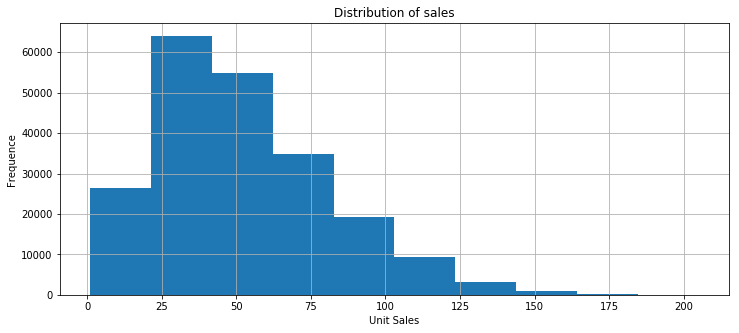

In [14]:
# plot all of the data by unit sales
df_train.hist(column='sales', figsize=(12,5))
plt.title('Distribution of sales')
plt.xlabel('Unit Sales')
plt.ylabel('Frequence')
plt.show()

Most of the saler per item are distributed closely around 50 units.  (it's skewed a little to the right)

Let's plot the data by date and sales.

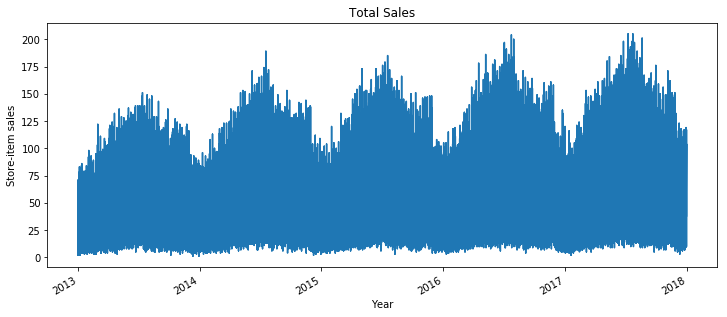

In [15]:
# set the index of this data to equal the date_time column for graphing purposes
df_date_index = df_train.set_index('date_time')

# plot the data
df_date_index['sales'].plot(figsize=(12, 5))
plt.title('Total Sales')
plt.xlabel('Year')
plt.ylabel('Store-item sales')
plt.show()

What do you notice about the history of store-item sales ? 

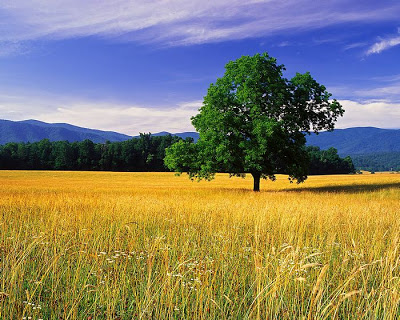

In [16]:
Image(filename='tree2.jpg')

We definitely have some seasonality.  What's happening around Thanksgiving / Christmas ?  

How well will a simple regression model represent this data ?  

<br />

The power of pandas, scikit-learn and machine learning in a Python environment....

In [17]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# define model inputs
x = df_train[['store', 'item']]
y = df_train['sales'].values

# fit model to data
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

# run some test predictions
y_ = regr.predict([[1, 1]])
y2_ = regr.predict([[2, 1]])
y3_ = regr.predict([[5, 45]])

print(y_)
print(y2_)
print(y3_)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [-0.06404578 -0.11497556]
Intercept: 
 55.566277218947484

R-squared:
0.003359079903902828
[55.38725587]
[55.32321009]
[50.07214792]
Duration: 0:00:00.057003


How accurate is this regression model ?  
- R-squared = 0.0034  
- ***0.34% of the variance of the data is explained in this model.***  

Now, let's try and used K-Nearest Neighbor method we discussed earlier.

In [18]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define model inputs
x = df_train[['store', 'item']]
y = df_train['sales'].values

# fit model to data
knn.fit(x, y)

# run some test predictions
y_ = knn.predict([[1, 1]])
y2_ = knn.predict([[2, 1]])
y3_ = knn.predict([[5, 45]])

print(y_)
print(y2_)
print(y3_)

# Display the r-squared
print('\nR-squared:')
print(knn.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

[12.86666667]
[21.13333333]
[52.93333333]

R-squared:
0.47902217484964954
Duration: 0:00:06.067348


Better ?  

Can we add another feature to improve the accuracy of our model ?  Here again is a simple plot of our data:

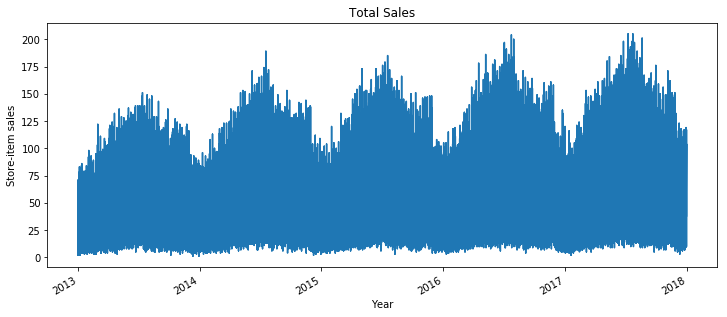

In [19]:
# set the index of this data to equal the date_time column for graphing purposes
df_date_index = df_train.set_index('date_time')

# plot the data
df_date_index['sales'].plot(figsize=(12, 5))
plt.title('Total Sales')
plt.xlabel('Year')
plt.ylabel('Store-item sales')
plt.show()

What would help our nearest neighbor algorithm ?  

<br />
<br />
<br />
<br />
<br />

Let's break out some knew features to see if we can improve the model's accuracy:

In [20]:
df_train['month'] = df_train.date_time.dt.month
df_train['year'] = df_train.date_time.dt.year

# Extract the weekday.  0 = Monday, 1 = Tuesday, etc...
df_train['weekday'] = df_train.date_time.dt.weekday
df_train['day'] = df_train.date_time.dt.day

In [21]:
df_train.head()

,date,store,item,sales,date_time,month,year,weekday,day
2,2013-01-03,1,1,14,2013-01-03,1,2013,3,3
11,2013-01-12,1,1,7,2013-01-12,1,2013,5,12
17,2013-01-18,1,1,7,2013-01-18,1,2013,4,18
20,2013-01-21,1,1,8,2013-01-21,1,2013,0,21
22,2013-01-23,1,1,9,2013-01-23,1,2013,2,23


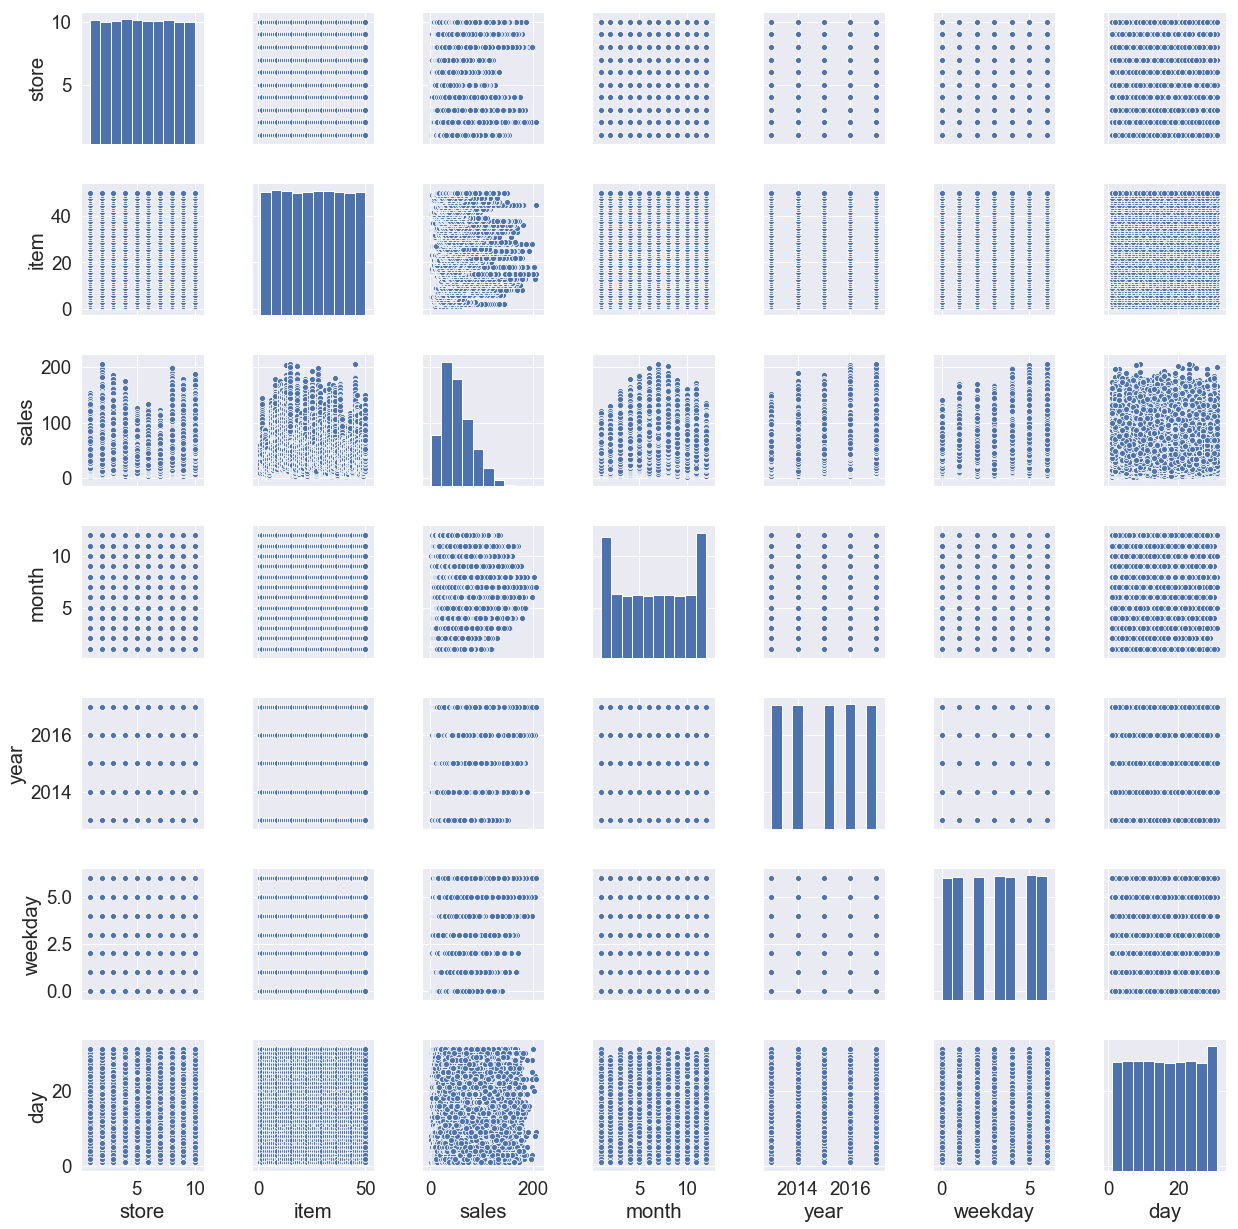

In [22]:
sns.set(font_scale=1.7)
sns.pairplot(df_train)
plt.show()

#### Add "month" to both models. ------------------------------------------------------------------------------------------------------------

In [23]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# define model inputs
x = df_train[['store', 'item', 'month']]
y = df_train['sales'].values

# fit model to data
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [-0.06418292 -0.11469956  0.7276512 ]
Intercept: 
 50.81204401305329

R-squared:
0.010960942456713751
Duration: 0:00:00.057003


*R-squared improved from 0.0034 to 0.011*

In [24]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define model inputs
x = df_train[['store', 'item', 'month']]
y = df_train['sales'].values

# fit model to data
knn.fit(x, y)

# Display the r-squared
print('\nR-squared:')
print(knn.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


R-squared:
0.8188952950903845
Duration: 0:00:03.537202


*R-squared improved from 0.479 to 0.819*

#### Now add "year" feature. --------------------------------------------------------------------------------------------------------------------

In [25]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# define model inputs
x = df_train[['store', 'item', 'month', 'year']]
y = df_train['sales'].values

# fit model to data
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [-0.05965905 -0.11355376  0.73304577  3.68478855]
Intercept: 
 -7374.139195073067

R-squared:
0.04364147402489016
Duration: 0:00:00.069004


*R-squared improved from 0.011 to 0.044*

In [26]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define model inputs
x = df_train[['store', 'item', 'month', 'year']]
y = df_train['sales'].values

# fit model to data
knn.fit(x, y)

# Display the r-squared
print('\nR-squared:')
print(knn.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


R-squared:
0.8251922858505858
Duration: 0:00:07.551432


*R-squared improved from 0.819 to 0.825*

#### Now add "weekday" feature ! ------------------------------------------------------------------------------------------------------------

In [27]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# define inputs to model
x = df_train[['store', 'item', 'month', 'year', 'weekday']]
y = df_train['sales'].values

# fit model to data
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [-0.05980083 -0.11435344  0.736365    3.67581118  3.21012016]
Intercept: 
 -7365.714060184777

R-squared:
0.09327981920634665
Duration: 0:00:00.093006


*R-squared improved from 0.044 to 0.093*

In [28]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define inputs to data
x = df_train[['store', 'item', 'month', 'year', 'weekday']]
y = df_train['sales'].values

# fit model to data
knn.fit(x, y)

# Display the r-squared
print('\nR-squared:')
print(knn.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


R-squared:
0.8382481093855427
Duration: 0:00:10.865622


*R-squared improved from 0.825 to 0.838*

#### Add one more feature:  "Day" of the month ---------------------------------------------------------------------------------------

In [29]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# define inputs to model
x = df_train[['store', 'item', 'month', 'year', 'weekday', 'day']]
y = df_train['sales'].values

# fit model to the data
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [-0.05977839 -0.11433615  0.73623175  3.67580707  3.21010773  0.00533956]
Intercept: 
 -7365.789298857893

R-squared:
0.0932824779073348
Duration: 0:00:00.089005


*R-squared changed from 0.0932798 to 0.0932825* 

In [30]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define inputs to model
x = df_train[['store', 'item', 'month', 'year', 'weekday', 'day']]
y = df_train['sales'].values

# fit model to data
knn.fit(x, y)

# Display the r-squared
print('\nR-squared:')
print(knn.score(x, y))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


R-squared:
0.5633686940855609
Duration: 0:00:13.648781


What happened ???

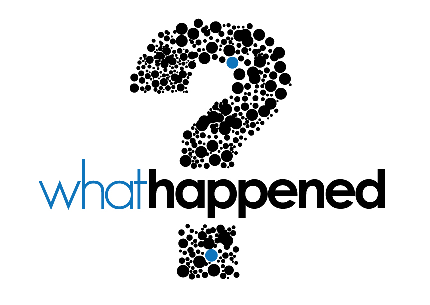

In [31]:
Image(filename='what.jpg')

Let's look at the pairplot one more time...

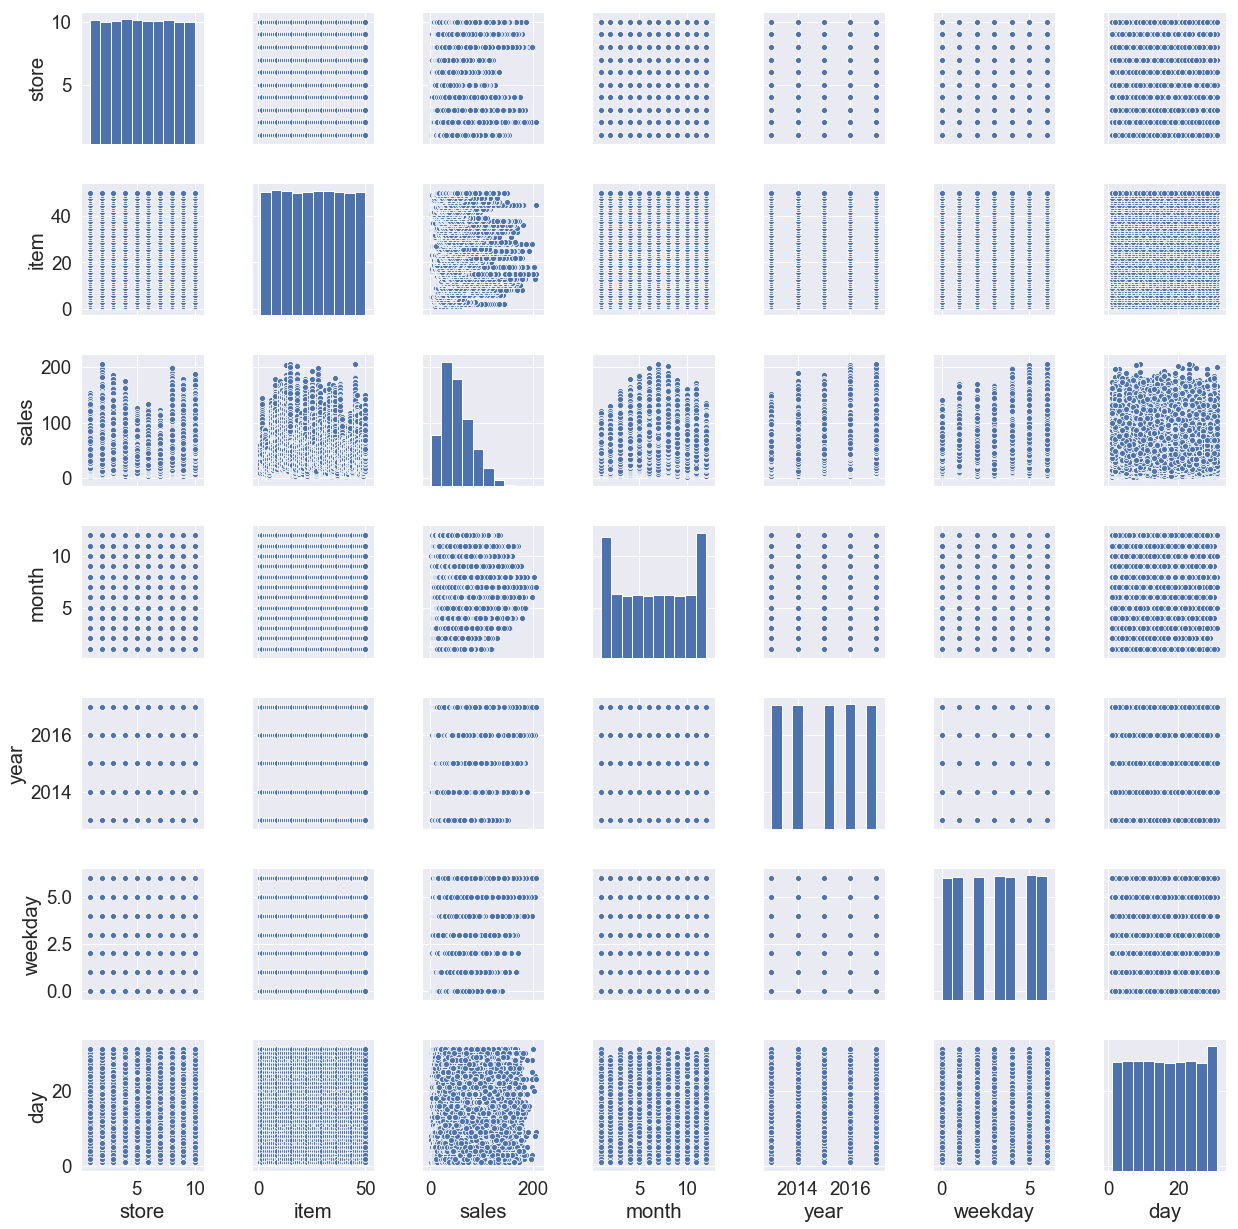

In [32]:
sns.set(font_scale=1.7)
sns.pairplot(df_train)
plt.show()

*R-squared ***decreased*** from 0.838 to 0.563*  

<br />

The day of the month feature added noise to the dataset and decreased the accuracy. 

<br />

Conclusion:  The KNN regression model was much, much better than simple linear regression for modeling seasonality data.  
- The best Simple Linear Regression model yielded an accuracy of:  **9.33%**  
- The best K Nearest Neighbor Regression model yielded an accuracy of:  **83.8%**  

<br />

The next step would be to model holidays (Thanksgiving and / or Christmas) to improve the accuracy even further.

## Thank you !!  

<br />

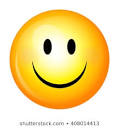

In [33]:
Image(filename='smile.jpg')